``Pytorch``
---
[教程]https://pytorch.apachecn.org/#/docs/1.7/03  
[知乎60分钟快速入门]https://zhuanlan.zhihu.com/p/66543791

In [19]:
import torch
print(torch.__version__)
print(torch.cuda.is_available())#是否可用
print(torch.cuda.device_count())#数量
print(torch.version.cuda) # 查看CUDA的版本号
import numpy as np

2.0.1+cu118
True
1
11.8


In [20]:
tensor = torch.rand(3,4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")
# 判断当前环境GPU是否可用, 然后将tensor导入GPU内运行
if torch.cuda.is_available():
    tensor = tensor.to('cuda')
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu
Device tensor is stored on: cuda:0


# 张量

> 1.1声明和定义

In [21]:
data=[[1,2],[3,4]]
x_data=torch.tensor(data)#数据张量化
print(x_data)
x_ones=torch.ones_like(x_data)#生成X_data形状的tensor全为1的数据
x_rand=torch.rand_like(x_data,dtype=torch.float)
print(x_ones,x_rand)
#指定数组维度生成张量
shape=(2,3,)
rand_tensor=torch.rand(shape)
ones_tensor=torch.ones(shape)
zeros_tensor=torch.zeros(shape)
#张量的属性
print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")
ones_tensor = ones_tensor.to('cuda')
print(ones_tensor.shape,ones_tensor.dtype,ones_tensor.device)#shape、数据类型、存储设备
print(ones_tensor.size())


tensor([[1, 2],
        [3, 4]])
tensor([[1, 1],
        [1, 1]]) tensor([[0.5616, 0.5374],
        [0.4436, 0.6336]])
Random Tensor: 
 tensor([[1.9051e-01, 3.3383e-01, 3.6365e-01],
        [1.5209e-01, 8.7607e-01, 4.7404e-04]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])
torch.Size([2, 3]) torch.float32 cuda:0
torch.Size([2, 3])


> 1.2操作(operations)

In [22]:
tensor1=torch.tensor([5.5,3])
tensor3=tensor1.new_ones(5,3,dtype=torch.double)
tensor4=torch.rand(5,3)
print(tensor1,tensor3,tensor4)

print('tensor3+tensor4',tensor3+tensor4)
print('tensor3+tensor4=',torch.add(tensor3,tensor4))
result=torch.empty(5,3)
torch.add(tensor3,tensor4,out=result)
print('add result=',result)
tensor3.add_(tensor4)#直接在tensor3上加
print('tensor3=',tensor3)

tensor([5.5000, 3.0000]) tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64) tensor([[0.0787, 0.2334, 0.3368],
        [0.9869, 0.5859, 0.2170],
        [0.0047, 0.1703, 0.0897],
        [0.7723, 0.1253, 0.5208],
        [0.7332, 0.9507, 0.6026]])
tensor3+tensor4 tensor([[1.0787, 1.2334, 1.3368],
        [1.9869, 1.5859, 1.2170],
        [1.0047, 1.1703, 1.0897],
        [1.7723, 1.1253, 1.5208],
        [1.7332, 1.9507, 1.6026]], dtype=torch.float64)
tensor3+tensor4= tensor([[1.0787, 1.2334, 1.3368],
        [1.9869, 1.5859, 1.2170],
        [1.0047, 1.1703, 1.0897],
        [1.7723, 1.1253, 1.5208],
        [1.7332, 1.9507, 1.6026]], dtype=torch.float64)
add result= tensor([[1.0787, 1.2334, 1.3368],
        [1.9869, 1.5859, 1.2170],
        [1.0047, 1.1703, 1.0897],
        [1.7723, 1.1253, 1.5208],
        [1.7332, 1.9507, 1.6026]])
tensor3= tensor([[1.0787, 1.2334, 1.3368],
        [1.9869, 1.5859, 1.21

In [23]:
print(tensor3[:,2])#index=0 1 2

tensor([1.3368, 1.2170, 1.0897, 1.5208, 1.6026], dtype=torch.float64)


In [24]:
#对tensor尺寸的修改
x=torch.randn(4,4)
print(x)
y=x.view(16)
z=x.view(-1,8)
print(x.size(),y.size(),z.size())
x=torch.randn(1)
print('x:',x) 
print(x.item())

tensor([[ 1.1328,  0.8003,  0.8857, -0.6657],
        [-0.8999,  0.8548,  0.3808, -0.8073],
        [ 0.7468,  0.5910, -0.3730, -0.2209],
        [ 2.0584, -0.2445,  1.0662,  0.2919]])
torch.Size([4, 4]) torch.Size([16]) torch.Size([2, 8])
x: tensor([0.8131])
0.8131190538406372


>1.3tensor与numpy数组的互换

In [25]:
a=torch.ones(5)
b=a.numpy()#tensor变numpy数组
print(a)
print(b)

a.add_(1)#共享内存空间
print(a)
print(b)
print('/////')
#numpy数组转换为tensor
import numpy as np
a=np.ones(5)
b=torch.from_numpy(a)
np.add(a,1,out=a)
print(a)
print(b)

tensor([1., 1., 1., 1., 1.])
[1. 1. 1. 1. 1.]
tensor([2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2.]
/////
[2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2.], dtype=torch.float64)


>1.4 cuda张量

In [26]:
if torch.cuda.is_available():
    device=torch.device('cuda')
    y=torch.ones_like(x,device=device)
    x=x.to(device)
    z=x+y
    print(z)
    print(z.to('cpu',torch.double))

tensor([1.8131], device='cuda:0')
tensor([1.8131], dtype=torch.float64)


2.autograd

2.1张量

In [27]:
import torch
x=torch.ones(2,2,requires_grad=True)
print(x)
y=x+2
print(y)
print(y.grad_fn)
z=y*y*3
out=z.mean()
print('z=',z)
print('out=',out)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)
tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)
z= tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>)
out= tensor(27., grad_fn=<MeanBackward0>)


In [28]:
a=torch.randn(2,2)
a=((a*3)/(a-1))
print(a.requires_grad)
a.requires_grad_(True)#将梯度属性打开
print(a.requires_grad)
b=(a*a).sum()
print(b.grad_fn)

False
True


2.2梯度

In [29]:
out.backward()#out.backeard(torch.tensor(1.))
print(x.grad)

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])


> 3 神经网络

3.1定义神经网络

In [30]:
import torch
import torch.nn as nn
import torch.nn.functional as F
#5层神经网络，包含两层卷积层。和三层全连接层  
class Net(nn.Module):
    
    def __init__(self):
        super(Net,self).__init__()
        #输入图像是单通道，conv1 kernel size=5*5 输出通道6
        self.conv1=nn.Conv2d(1,6,5)
        #conv2 kernel size=5*5,输出通道16
        self.conv2=nn.Conv2d(6,16,5)
        #全连接层
        self.fc1=nn.Linear(16*5*5,120)
        self.fc2=nn.Linear(120,84)
        self.fc3=nn.Linear(84,10)
        
    def forward(self,x):
            #max-pooling 采用一个（2,2）的滑动窗口
            x=F.max_pool2d(F.relu(self.conv1(x)),(2,2))
            #核的大小是方形的话，可仅定义一个数字，如（2,2）用2即可
            x=F.max_pool2d(F.relu(self.conv2(x)),2)
            x=x.view(-1,self.num_flat_features(x))
            x=F.relu(self.fc1(x))
            x=F.relu(self.fc2(x))
            x=self.fc3(x)
            return x
    def num_flat_features(self,x):
            #除了batch维度以外的所有维度
            size=x.size()[1:]
            num_features=1
            for s in size:
                num_features*=s
            return num_features
net=Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [31]:
# sourcery skip: avoid-builtin-shadow
params=list(net.parameters())
print('参数数量：',len(params))
#conv1.weight
print('第一个参数的大小：',params[0].size())

#随机定义一个变量输入网格
input=torch.randn(1,1,32,32)
out=net(input)
print(out)
#反向传播需要先清空梯度缓存，并计算随机梯度进行反向传播
net.zero_grad()
out.backward(torch.randn(1,10))

参数数量： 10
第一个参数的大小： torch.Size([6, 1, 5, 5])
tensor([[ 0.0070, -0.0933,  0.1652, -0.1205,  0.1121,  0.0911, -0.1903,  0.0799,
          0.1664,  0.0845]], grad_fn=<AddmmBackward0>)


3.2损失函数

In [32]:
output=net(input)

target=torch.randn(10)#建立伪标签
target=target.view(1,-1)#调整大小
criterion=nn.MSELoss()
loss=criterion(output,target)
print(loss)

tensor(1.1539, grad_fn=<MseLossBackward0>)


grad_fn显示张量运算怎么来的

In [33]:
print(loss.grad_fn)
a=torch.tensor([3.0,4]);a.requires_grad_(True)#将梯度属性打开
b=torch.tensor([5,6.0]);b.requires_grad_(True)#将梯度属性打开
c=a+b
a,b,c
print(c.grad_fn)

input -> conv2d -> relu -> maxpool2d -> conv2d -> relu -> maxpool2d  
-> view -> linear -> relu -> linear -> relu -> linear  
-> MSELoss  
-> loss

3.3 反向传播  
只需调动loss.backward()即可，但需要先清空当前梯度缓存

In [34]:
net.zero_grad()
print('conv1.bias.grad before backward',net.conv1.bias.grad)
loss.backward()
print('conv1.bias.grad after backward:',net.conv1.bias.grad)

conv1.bias.grad before backward None
conv1.bias.grad after backward: tensor([ 0.0118,  0.0081,  0.0193, -0.0096,  0.0021,  0.0048])


3.4更新权重

In [35]:
#weight=weight-learning_rate*gradient
# 简单实现权重的更新例子
learning_rate = 0.01
for f in net.parameters():
    f.data.sub_(f.grad.data * learning_rate)

In [36]:
import torch.optim as optim#优化算法实现权重更新
# 创建优化器
optimizer = optim.SGD(net.parameters(), lr=0.01)

# 在训练过程中执行下列操作
optimizer.zero_grad() # 清空梯度缓存
output = net(input)
loss = criterion(output, target)
loss.backward()
# 更新权重
optimizer.step()

> 训练分类器

4.1 训练数据

In [41]:
import torch
import torchvision
import torchvision.transforms as transforms


In [46]:
transform = transforms.Compose(
    [transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                            shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                        download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                            shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
            'deer', 'dog', 'frog', 'horse', 'ship', 'truck')



Files already downloaded and verified
Files already downloaded and verified


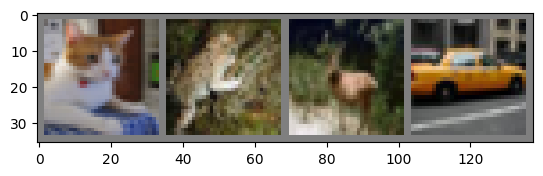

  cat  frog  deer   car


In [49]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

2.定义卷积神经网络

In [ ]:
import torch.nn as nn
import torch.nn.functional as F
class Net(nn.Model):
    def __init__(self):
        super(Net,self).__init__()
        self.conv1=nn.Conv2d(3,6,5)#二维卷积第1层
        self.pool=nn.MaxPool2d(2,2)#池化层
        self.conv1=nn.Conv2d(6,16,5)#二维卷积第2层
        self.fc1=nn.Linear(16*5*5,120)#全连接层
        self.fc2=nn.Linear(120,84)
        self.fc3=nn.Linear(84,10)
    def forward(self,x):
        x=self.pool(F.relu(self.conv1(x)))
        x=self.pool(F.relu(self.conv2(x)))
        x=x.view(-1,16*5*5)
        x=F.relu(self.fc1(x))
        x=F.relu(self.fc2(x))
        x=self.fc3(x)
        return x
net=Net()

3.定义损失函数及优化器

In [51]:
import torch.optim as optim
criterion =nn.CrossEntropyLoss()
optimizer=optim.SGD(net.parameters(),lr=0.001,momentum=0.9)
